## PRINCIPLE COMPONENT ANALYSIS

### Authors
 Ndèye Gagnessiry Ndiaye and Christin Seifert  
 
### License
This work is licensed under the Creative Commons Attribution 3.0 Unported License https://creativecommons.org/licenses/by/3.0/ 

This notebook:

- creates PCA projections of Iris dataset
 
 

In [7]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

In [8]:
from sklearn import datasets
iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth'] 
x.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We apply Principal Component Analysis to the Iris dataset with 4-dimensions (all components are keeped).

In [9]:
pca = PCA(n_components=4)
pca.fit(iris.data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
eigen_values =pca.explained_variance_
print(eigen_values)

[ 4.19667516  0.24062861  0.07800042  0.02352514]


In [11]:
eigen_vectors = pca.components_
print(eigen_vectors)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


We project data in the PCA 4-dimensionnal space.

In [12]:
projection = pca.transform(iris.data)
x = pd.DataFrame(projection)
x.columns = ['PC1','PC2','PC3','PC4'] 
x.head()

,PC1,PC2,PC3,PC4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


The following figure shows successively the projections on (x=PC1,y=PC2), (x=PC1,y=PC3),(x=PC1,y=PC4),(x=PC2,y=PC3),(x=PC2,y=PC4) and (x=PC3,y=PC4). Data is best separated with the components with largest eigenvalues (highest variance).

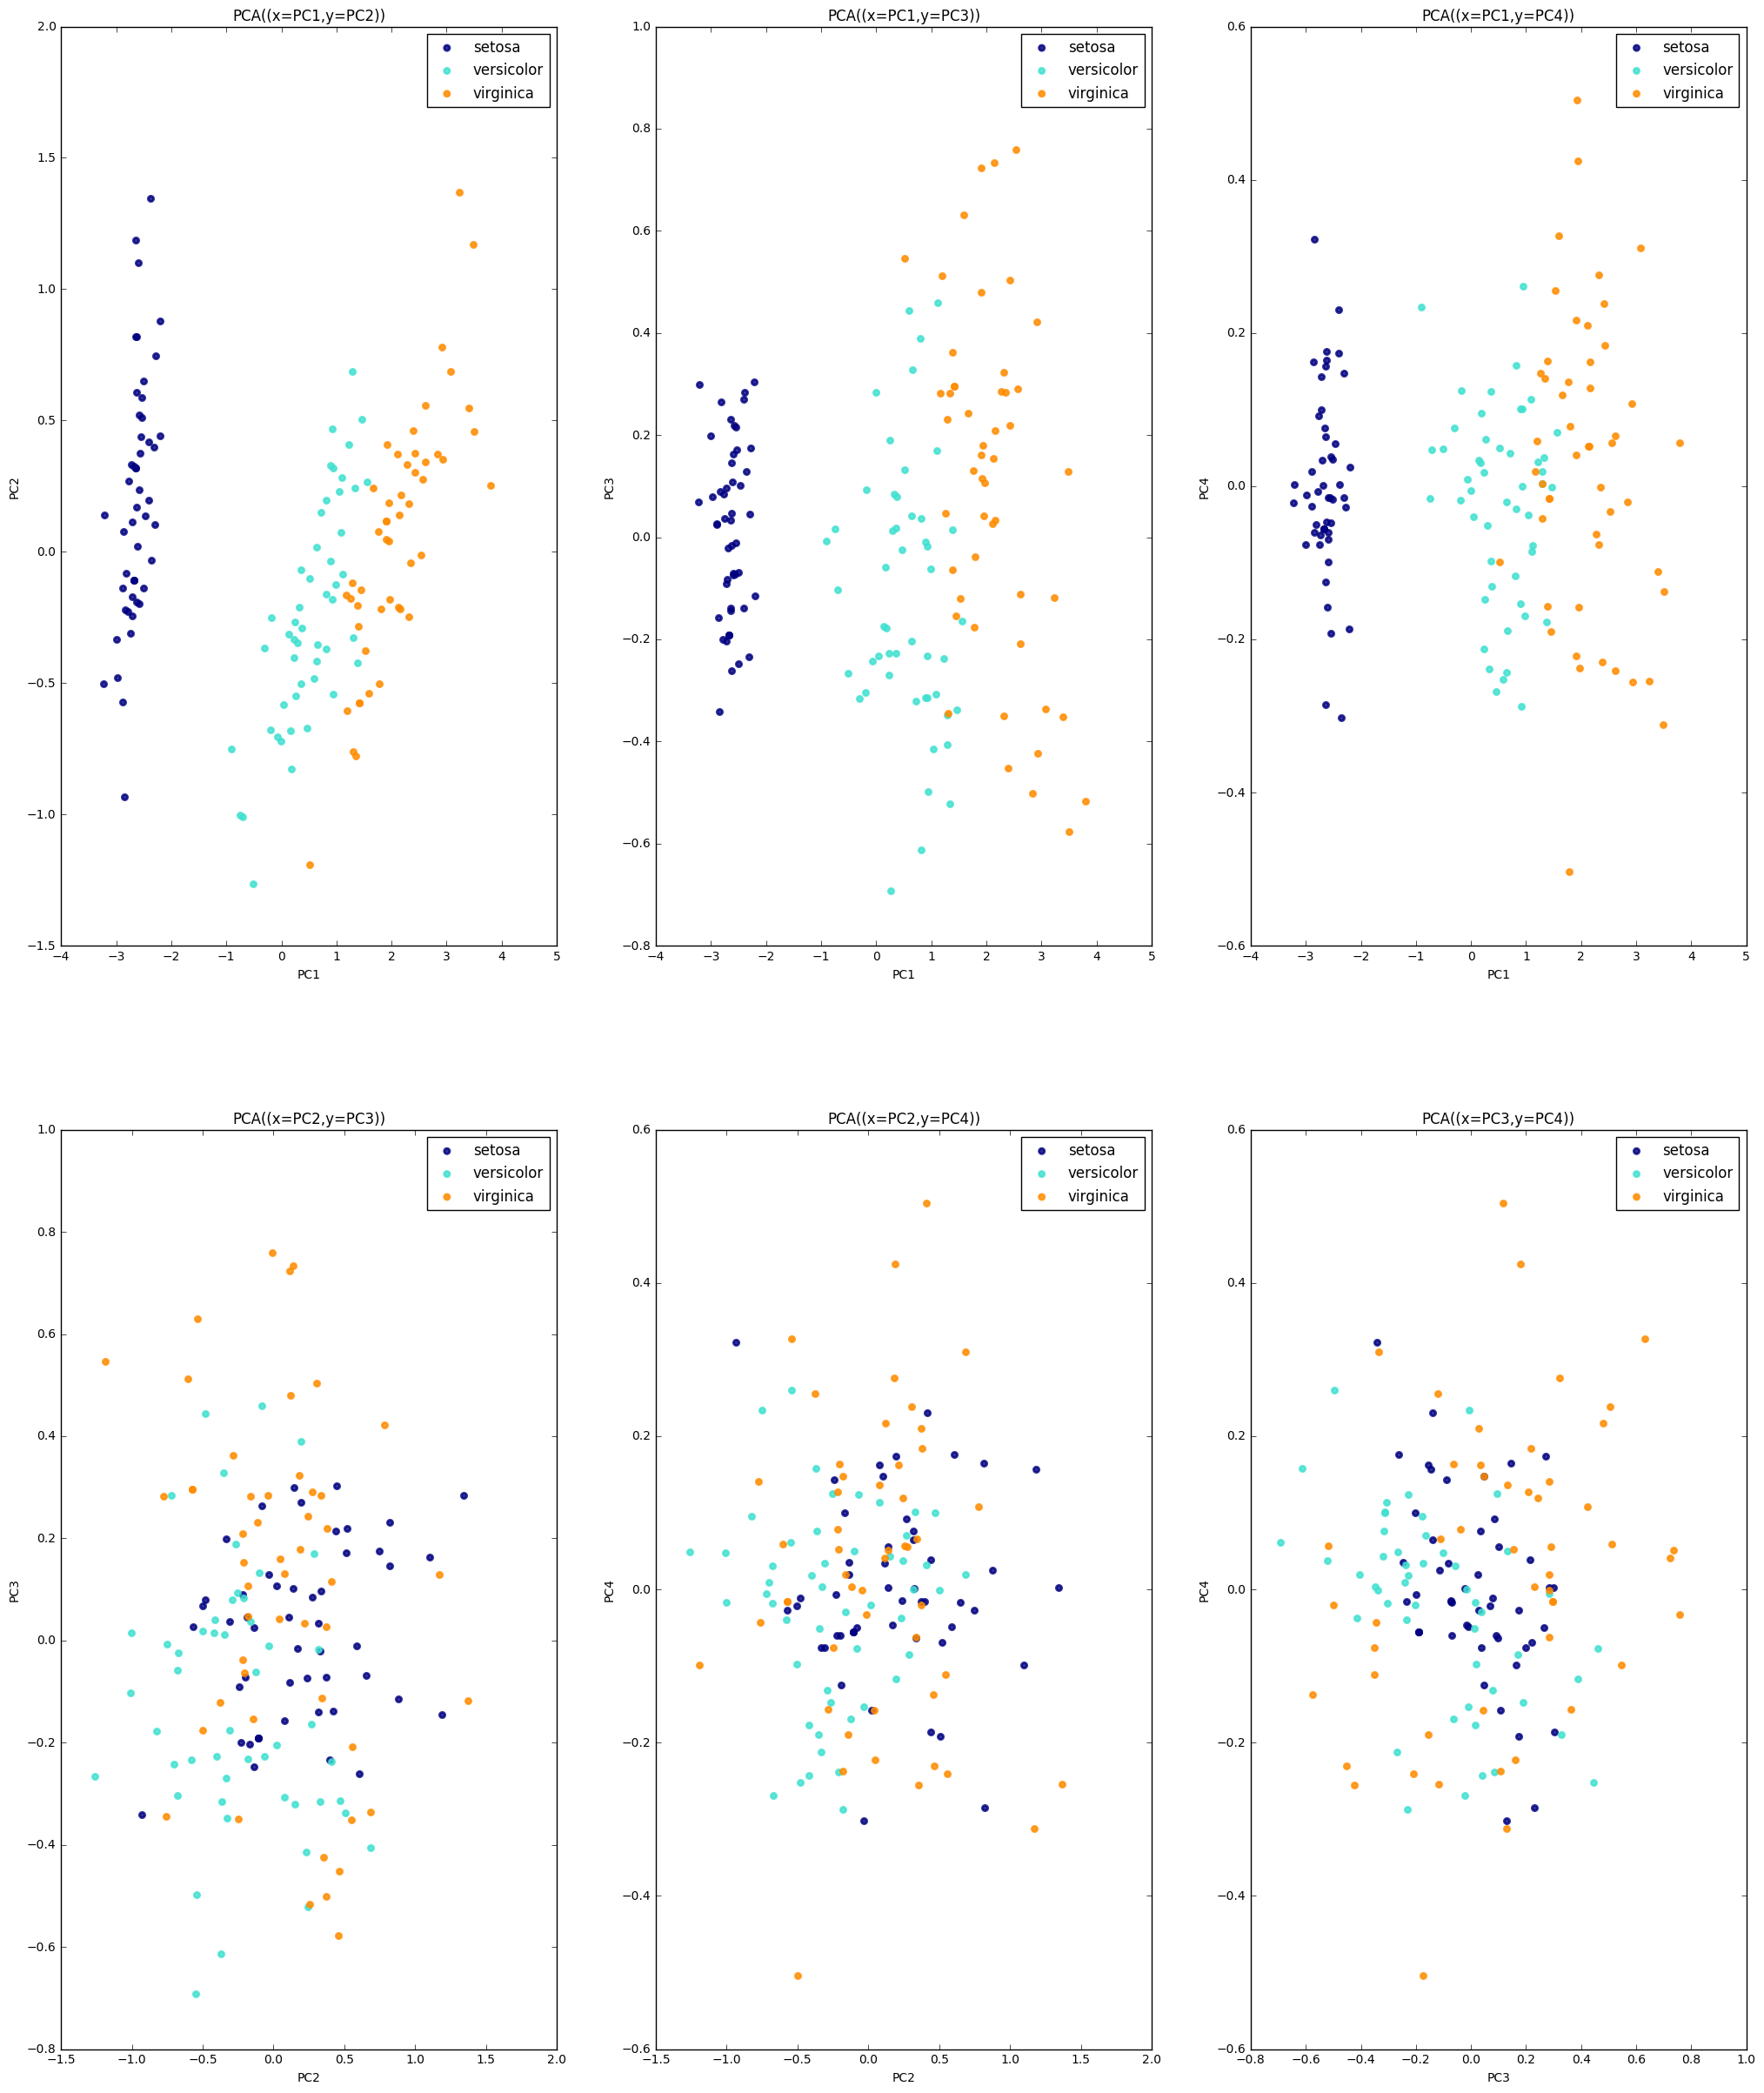

In [13]:
# Show projections

y = iris.target
target_names = iris.target_names

colors = ['navy', 'turquoise', 'darkorange']
lw = 2

plt.figure(figsize=(25,30))

plt.subplot(231)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 0], projection[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA((x=PC1,y=PC2))')

plt.subplot(232)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 0], projection[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PCA((x=PC1,y=PC3))')

plt.subplot(233)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 0], projection[y == i, 3], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title('PCA((x=PC1,y=PC4))')

plt.subplot(234)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 1], projection[y == i, 2], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PCA((x=PC2,y=PC3))')

plt.subplot(235)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 1], projection[y == i, 3], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.title('PCA((x=PC2,y=PC4))')

plt.subplot(236)
for color, i, target_name in zip(colors, [0, 1,2], target_names):
    plt.scatter(projection[y == i, 2], projection[y == i, 3], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('PCA((x=PC3,y=PC4))')


plt.show()